[ Описание проекта](#0)

[1. Подготовка данных](#1)

[2. Исследовательский анализ данных (EDA)](#2)

[3. Построение модели прогнозирования оттока клиентов](#3)

[4. Кластеризация клиентов](#4)

[5. Выводы и рекомендации](#5)

# Анализ клиентов фитнес-центров для снижения оттока

<a name="0"></a>
# Описание проекта
Отдел по работе с клиентами сети фитнес-центров предоставил клиентские анкеты в электроном виде для разработки стратегии взаимодействия с клиентами на основе аналитических данных. Данные содержат сведения на месяц до оттока и факт оттока на определённый месяц.

**Цель - провести анализ и подготовить план действий по удержанию клиентов.**

**Задачи:**
- спрогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
- сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
- проанализировать основные признаки, наиболее сильно влияющие на отток;
- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
 - выделить целевые группы клиентов;
 - предложить меры по снижению оттока;
 - определить другие особенности взаимодействия с клиентами

<a name="1"></a>
## Подготовка данных

In [1]:
# Импортируем библиотеки:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

#Загрузим модули для обучения и метрики оценки моделей из соответсвующей библиотеки:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans

In [3]:
# Загрузим файл с данными:
gym = pd.read_csv('gym_churn.csv')
display(gym.head(5))
display(gym.info())
display(gym.describe())

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

None

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Приведём названия столбцов к нижнему регистру для универсальности и убедимся в отсутствии повторов.

In [4]:
gym.columns=gym.columns.str.lower()
print('Обнаружено повторов строк:', gym.duplicated().sum())

Обнаружено повторов строк: 0


В результате предварительного осмотра можем сказать, что:
- имеем в распоряжении данные о 4000 клиентах сети;
- во всех ячейках соответсвующий тип данных;
- пропущенных признаков нет;
- большинство клиентов проживают или работают в районе расположения фитнес-центра;
- большинстов клиентов не являются сотрудниками компаний-партнёров клуба и не участвовали в акции "приведи друга"
- контактный номер телефона оставили более 75% клиентов;
- длительность абонемента в основном составляет один месяц, время с первого обращения в фитнес-центр - 4 месяца (самые лояльные клиенты посещают занятия уже 31 месяц)
- групповые занятия посещают около 25% клиентов;
- средний возраст клиента - 30 лет, стандартное отклонение - 3 года
- отток составляет около 25% клиентов;
- средняя частота посещений в неделю - 2 занятия.

У переменных довольно разные по величине стандартные отклонения. Это говорит о том, что их возможно нужно стандартизировать перед обучением

<a name="2"></a>
## Исследовательский анализ данных (EDA)
Ранее мы изучили средние значения, стандартные отклонения и убедились в отсутвии пропущенных признаков.
Проведём дальнейшую «разведку данных» — EDA (исследовательский анализ данных).
Разделим клиентов на две группы: ушедших из фитнес-центра и оставшихся. Изучим внимательнее средние значения в полученных группах.

In [5]:
churn_clients = gym.query('churn == 1')
active_clients = gym.query('churn == 0')

In [6]:
print('В отток попали', 
      len(churn_clients),  
      'клиентов, что составляет {:.2%}'.format(len(churn_clients)/len(gym)), 
      'от общей базы. Активных клиентов в имеющейся базе -',
      len(active_clients), 'человек.')

display(gym.
        groupby('churn', as_index = False).
        mean().
        transpose().
        rename(columns={0: "active_clients", 1: "churn_clients"})
       )


В отток попали 1061 клиентов, что составляет 26.52% от общей базы. Активных клиентов в имеющейся базе - 2939 человек.


,active_clients,churn_clients
churn,0.000000,1.000000
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899


На первый взгляд видим, что на уровень оттока не оказывают влияния пол и наличие контактных данных.
Клиент, попавшие в отток, живут дальше, реже работают в компаниях-партнёрах и, скорее всего, не участвовали в промо акции, имеют меньший срок абонемента, реже посещают групповые тренировки.
Изучим распределение отдельных признаков, для этого построим гистограммы признаков. 

G:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
G:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


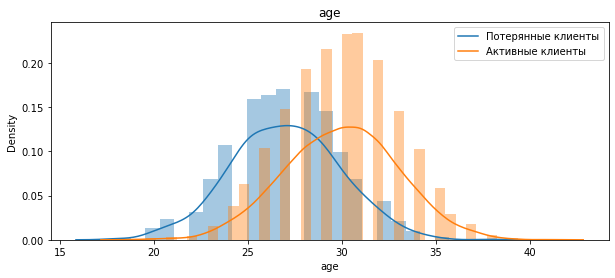

G:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
G:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


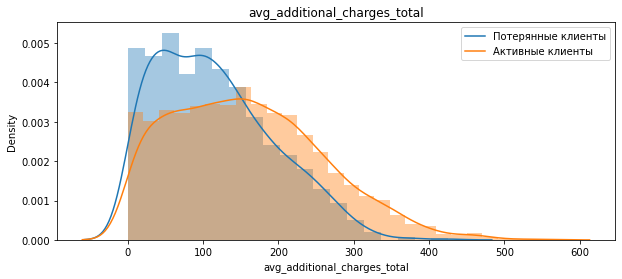

G:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
G:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


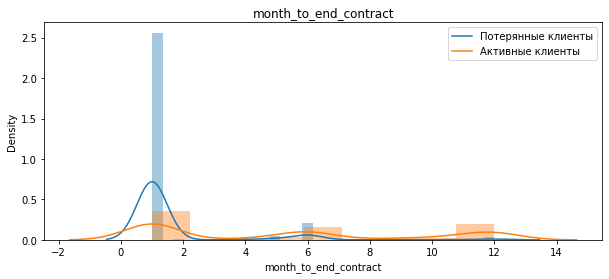

G:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
G:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


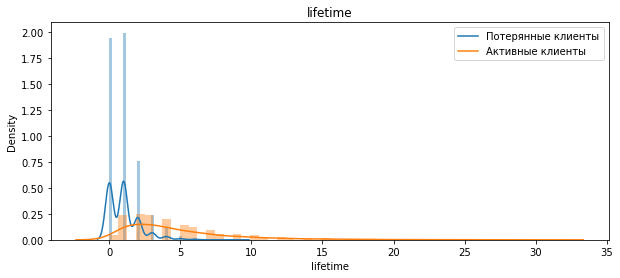

G:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
G:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


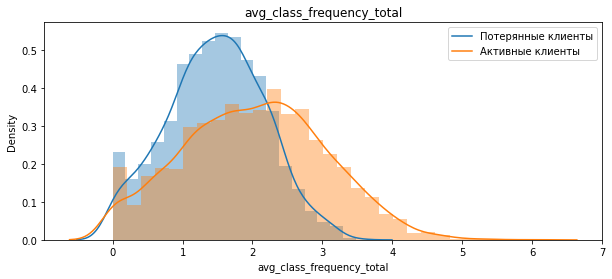

G:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
G:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


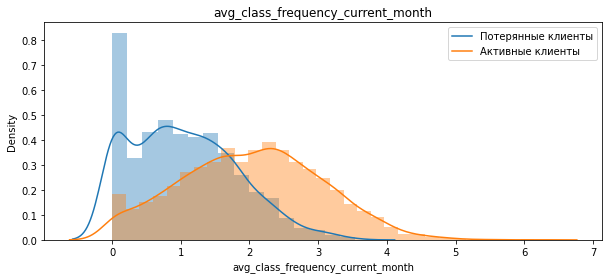

In [9]:
# для упрощения анализа выделим отдельно дискретные переменные:
discret_signs = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits','contract_period']   

# графики распределения для всех признаков - непрерывных перемен - отрисуем функцией distplot():
for sign in gym.drop(discret_signs, axis = 1).drop('churn', axis = 1).columns: 
    plt.figure(figsize=(10,4)) 
    plt.title(sign)
    sns.distplot(churn_clients[sign])
    sns.distplot(active_clients[sign])
    plt.legend(['Потерянные клиенты', 'Активные клиенты'])
    plt.show()

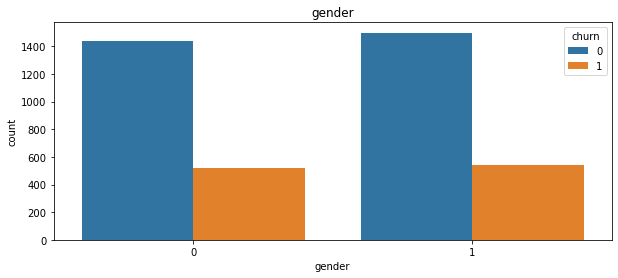

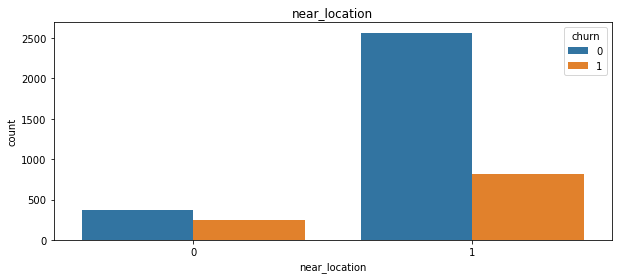

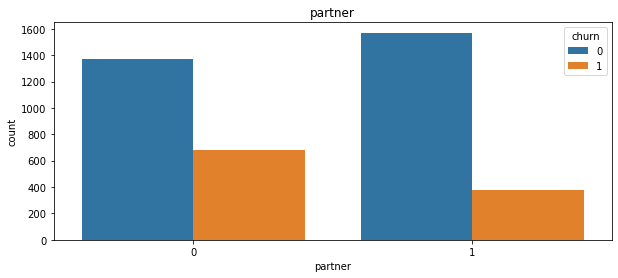

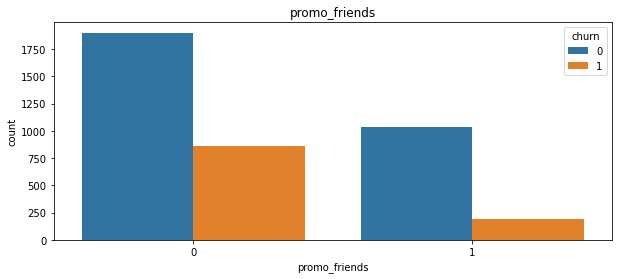

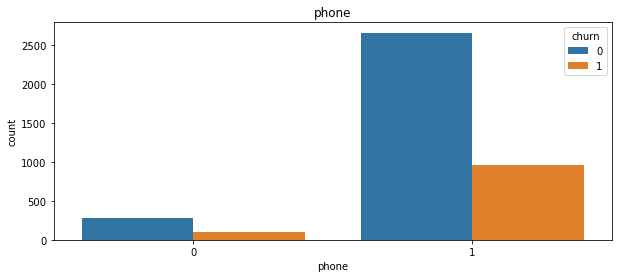

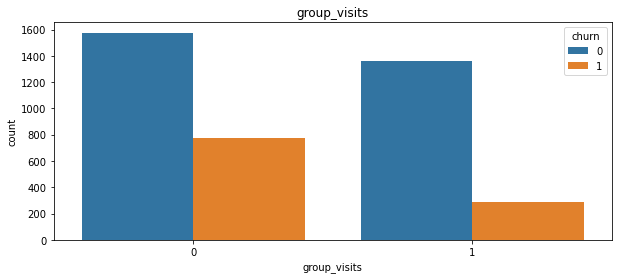

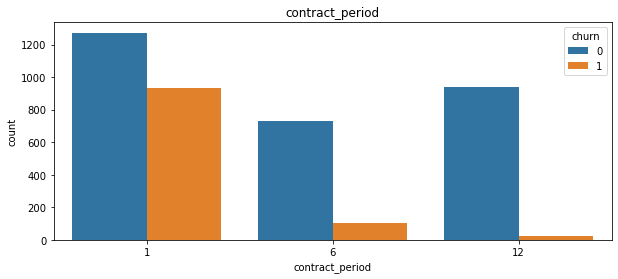

In [10]:
# для дискретных переменных построим столбчатые диаграммы:

for sign in discret_signs: 
    plt.figure(figsize=(10,4)) 

    sns.countplot(x = gym[sign], hue='churn', data=gym)
    plt.title(sign)
    plt.show()

Можем предположить, какие признаки станут ключевыми для модели:
- из графиков видно, что чем больше продолжительность абонемента и чем дольше срок до его истечения, тем меньше показатель оттока;
- для работников компаний-партнёров отток в два меньше больше, чем клиентов, не имеющих корпоративные скидки;
- после посещений групповых занятий снижается склонность покинуть заведение. Почти половина лояльных клиентов посещает групповые занятия, а среди ушедших таких около трети;
- чаще всего уходят клиентов в возрасте - 25-28 лет, а остаются люди в возрасте 30 - 32 года.В среднем ушедшие клиенты более молоды, чем оставшиеся — 27 лет против 30 лет;
- суммарная выручка от прочих услуг фитнес-центра повышается за счёт клиентов, которые вскоре уйдут;
- отток происходит чаще чаще в течение первых двух месяцев занятий, после пятого месяца клиенты уходят крайне редко;
- незадолго до ухода снижается частота посещения клиентами фитнес-центра до 1-2 занятий в неделю.
- в последний месяц перед уходом клиенты посещали зал в среднем раз в неделю, при норме лояльного клиента два раза в неделю.

Следующим признаками при оценке оттока можно пренебречь:
- близкое проживание или работа в районе, где находится фитнес-центр, не сильно влияют на мотивацию остаться;
- указание контактных данных не влияет на вероятность ухода.

Вычислим корреляционную матрицу и нарисуем на её основе тепловой таблицы.

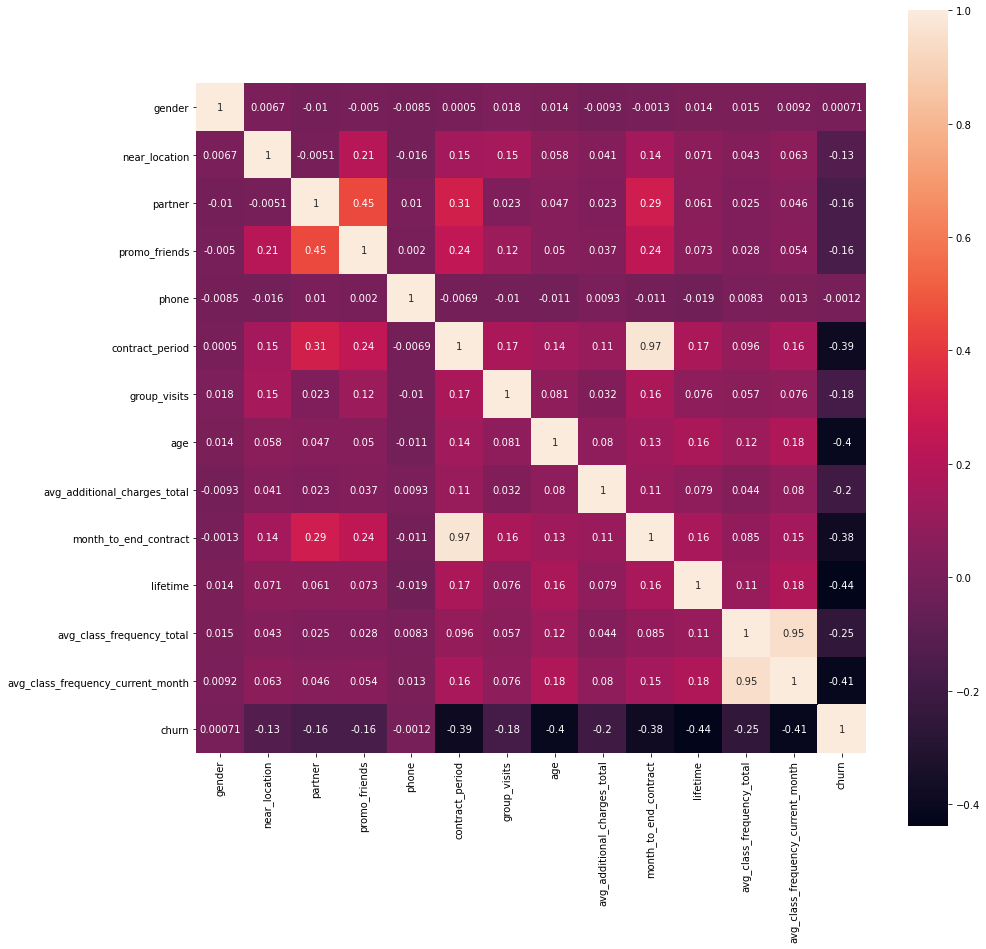

In [11]:
# корреляционная матрица
corr_m = gym.corr()
plt.figure(figsize = (15,15))
sns.heatmap(corr_m, square = True, annot = True) 
plt.show()

Обнаружили следующие мультиколлинеарные признаки (имеют тесную взаимосвязь): 
- длительность текущего абонемента и срок до окончания текущего абонемента;
- средняя частота посещений в неделю за предыдущий месяц и средняя частота посещений в неделю за все время с начала действия абонемента.

Признаки с самой низкой корелляцией с фактом оттока в текущем месяце:
- пол;
- наличие контактного телефона.

Признаки, наиболее сильно влияющие на отток:
- длительность посещений (время с момента первого обращения);
- средняя частота посещений в неделю за предыдущий месяц;
- возраст;
- длительность текущего абонемента. 

<a name="3"></a>
## Построение модели прогнозирования оттока клиентов

Для выделения двух классов клиентов - уйдет клиент или нет, выделим факт оттока как целевую переменную. Затем оценим вероятность рассматриваемого события.

In [12]:
# разделим данные на признаки (матрица X) и целевую переменную (y)
X = gym.drop('churn', axis = 1)
y = gym['churn']

# разделим модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify = y)

Все готово для дальнейшего обучения модели. Для решения задачи с определением факта оттока клиента сначала воспользуемся алгоритмом логистической регрессии. Преобразуем линейную регрессию для вычисления вероятности принадлежности к классу 1 - отток.



In [13]:
# создадим модель и отключим предупреждение библиотеки об изменеии алгоритма решения по умолчанию:
model = LogisticRegression(solver='liblinear', random_state=0)

# обучим модель
model.fit(X_train, y_train)

# рассчитаем прогноз класса после обучения модели:
predictions_by_logistic_regression = model.predict(X_test) 

# получим вероятность принадлежности объекта к первому или второму классу:
probabilities_by_logistic_regression = model.predict_proba(X_test)[:,1]

Оценим качество модели, полученной способом линейной регрессии.
Для оценки будем использовать следующие метрики:
- accuracy - доля правильных ответов;
- precision - точность;
- recall - полнота.

In [14]:
# выведем метрики для полученного прогноза: 
print('Полученные метрики для модели, полученной алгоритмом линейной регрессии:')
print('Accuracy : {:.2f}'.format(accuracy_score(y_test, predictions_by_logistic_regression) ))
print('Precision: {:.2f}'.format(precision_score (y_test, predictions_by_logistic_regression)))
print('Recall: {:.2f}'.format(recall_score (y_test, predictions_by_logistic_regression)))

Полученные метрики для модели, полученной алгоритмом линейной регрессии:
Accuracy : 0.93
Precision: 0.89
Recall: 0.83


Доля правильных ответов модели составляет 93%. Точность прогнозов среди целевого класса - оттока, составляет 86%. С помощью модели мы смогли обнаружить 83% реальных клиентов, попавших в отток. 

Для решения задачи с определением факта оттока клиента теперь воспользуемся алгоритмом случайного леса, т.е. сгенерируем ответы множества различных независимых друг от друга деревьев слегка разными способами, и на их основании ответов получим итоговое решение. 

In [15]:
# создаём объект класса scaler (нормализатор)
scaler = StandardScaler()  
scaler.fit(X_train)

# остандартизируем обучающую и тестовую выборки:
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

In [16]:
# зададим алгоритм для новой модели на основе алгоритма случайного леса:

model_by_random_forest = RandomForestClassifier(n_estimators = 100, random_state = 0)

# обучим модель случайного леса:
model_by_random_forest.fit(X_train_st, y_train)

# воспользуемся уже обученной моделью, чтобы сделать прогнозы:
predictions_by_random_forest = model_by_random_forest.predict(X_test_st) # Ваш код здесь
probabilities_by_random_forest = model_by_random_forest.predict_proba(X_test_st)[:,1]

In [17]:
# выведем метрики для полученного прогноза: 
print('Полученные метрики для модели, полученной алгоритмом случайного леса:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions_by_random_forest) ))
print('Precision: {:.2f}'.format(precision_score (y_test, predictions_by_random_forest)))
print('Recall: {:.2f}'.format(recall_score (y_test, predictions_by_random_forest)))

Полученные метрики для модели, полученной алгоритмом случайного леса:
Accuracy: 0.92
Precision: 0.88
Recall: 0.83


Доля правильных ответов модели составляет 92%. Точность прогнозов среди целевого класса - оттока, составляет 84%. С помощью модели мы смогли обнаружить 81% реальных клиентов, попавших в отток. 

По результатам обучения модели двумя способами можем сказать, что более качественной моделью является полученная алгоритмом логистической регрессии. Метрики у неё выше, чем у модели, полученной алгоритмом случайного леса. 

<a name="4"></a>
## Кластеризация клиентов
Для вычисления схожести между объектами и группировки объектов (кластеризации), необходимо начать со стандартизации данных. Стандартизация приведёт значения признаков к виду стандартного нормального распределения: значения будут центрированы относительно 0, а средний разброс данных составит 1. 

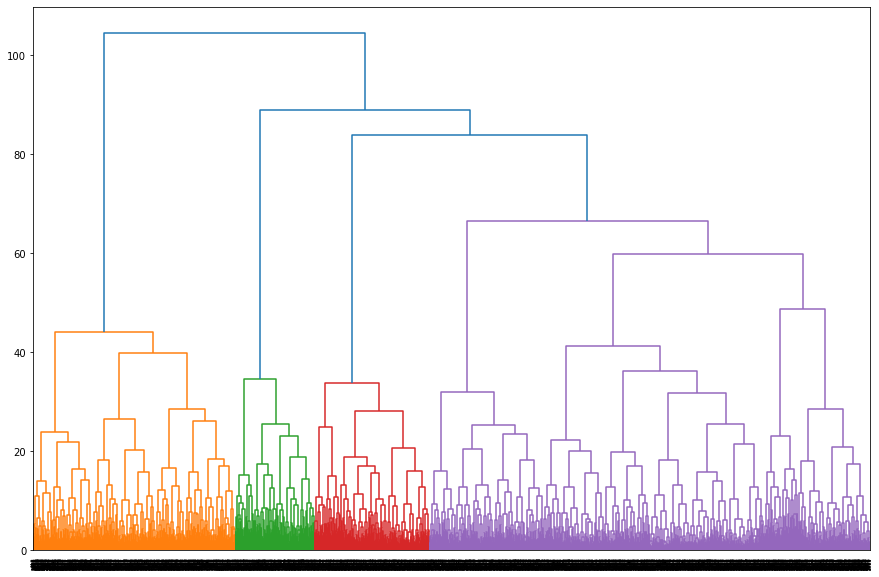

In [18]:
# обучаем нормализатор и преобразуем набор данных:
x_sc = scaler.fit_transform(X) 
# Передадим получившуюся стандартизированную таблицу в качестве параметра функции linkage():
linked = linkage(x_sc, method = 'ward') 
# Визуализируем таблицу связей между объектами как дендрограмму:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show() 

Предложенное оптимальное число кластеров 4 — четыре разных цвета на графике. Однако четвертый кластер занимет почти половину всех данных, поэтому разделим его на две части. Таким образом, предположим что можно выделить пять кластеров.

Получим модель кластеризации на основании алгоритма K-Means.


In [19]:
# задаём число кластеров, равное 5:
# в функции KMeans укажем random_state для сохранения комбинаций наблюдений при перезапуске кода
km = KMeans(n_clusters = 5, random_state = 0)
# применим алгоритм к данным и сформируем вектор кластеров:
labels = km.fit_predict(x_sc) 

# сохраним индексы предложенных алгоритмом групп в столбец датасета:
gym['cluster'] = labels

Посмотрим на средние значения признаков для кластеров. Для каждого полученного кластера спрогнозируем долю оттока (groupby). 

In [20]:
# выведем статистику по средним значениям наших признаков по кластеру
gym.groupby('cluster').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster,,,,,,,,,,,,,,
0,0.502970,0.959406,0.783168,0.574257,1.000000,10.889109,0.542574,29.982178,160.761016,9.954455,4.736634,1.982055,1.974789,0.027723
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,0.559666,0.976134,0.356802,0.230310,0.998807,2.669451,0.473747,30.125298,161.657905,2.459427,4.898568,2.852002,2.850161,0.068019


Описание кластеров:

**Кластер 0**. Кластер с самым низким уровнем оттока клиентов - 3%. Основные особенности:
- в основном клиенты живут или работают недалеко от фитнес-центра;
- высокая доля сотрудников компаний-партнеров - 78%;
- больше половины пришли по акции "приведи друга";
- наибольший срок абонемента - в среднем 11 месяцев (точнее - 12 - максимальный абонемент);
- чаще клиентов в других кластерах посещают групповые занятия;
- трятят немного больше на прочие услуги фитнес-центра.

**Кластер 1** Уровень оттока составляет 27%. Основные особенности:
- клиенты не оставляют контактные данные;
- большой срок абонемента - в среднем около пяти месяцев.

**Кластер 2** Уровень оттока составляет 44% - второй по целевому показателю. Основные особенности:
- живут или работают в другом районе;
- около половины клиентов - сотрудники компаний-партнеров;
- крайне редко приходят по промо-акции;
- реже клиентов в других кластерах посещают групповые занятия;
- в среднем посещают занятия 1-2 раза в неделю.

**Кластер 3** Кластер с самым высоким уровнем оттока клиентов - 51%. Основные особенности:
- все клиенты живут или работают недалеко от фитнес-центра;
- низкая доля сотрудников компаний-партнеров - 34%;
- меньше четверти клиентов пришли по промо-акции "приведи друга";
- наименьший срок абонемента - в среднем менее 2-х месяцев (т.е. в основном абонементы выдаются на 1 или 3 месяца);
- средний возраст клиента младше клиентов в других кластерах;
- трятят меньше клиентов в других кластерах на прочие услуги фитнес-центра;
- уходят в основном новенькие клиенты - проходившие чуть более двух месяцев;
- реже других посещают занятия как за все время, так и в последний месяц - один раз в неделю или реже.



**Кластер 4** Уровень оттока составляет 7%. Основные особенности:
- небольшое преобладание одного из полов;
- средний возраст клиента старше клиентов в других кластерах;
- трятят много на прочие услуги фитнес-центра.
- дольше других посещают занятия - в среднем около пяти месяцев с момента первого обращения;
- чаще клиентов в других кластерах посещают фитнес-клуб около 3 раз в неделю.

Построим распределения признаков для кластеров

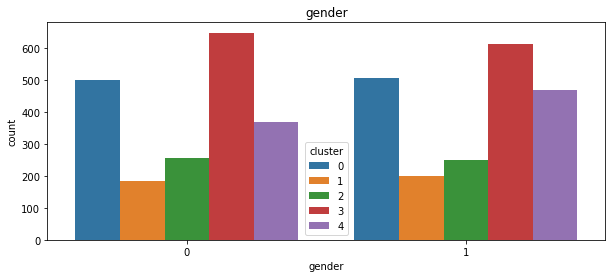

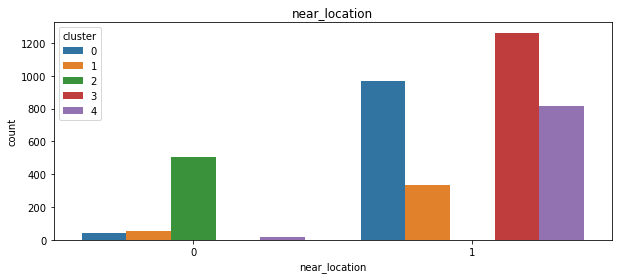

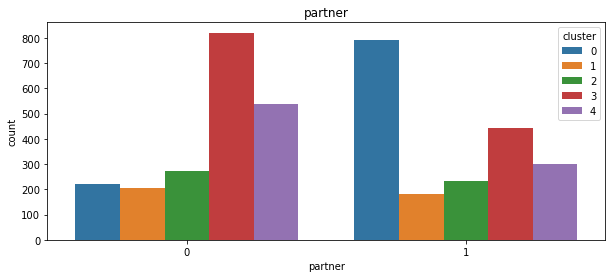

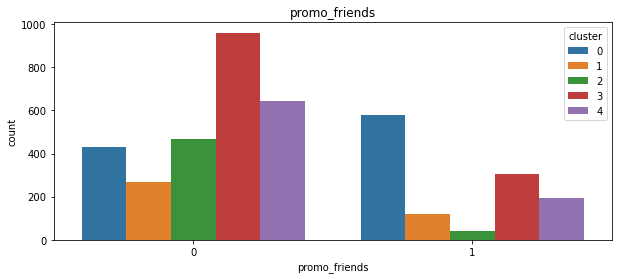

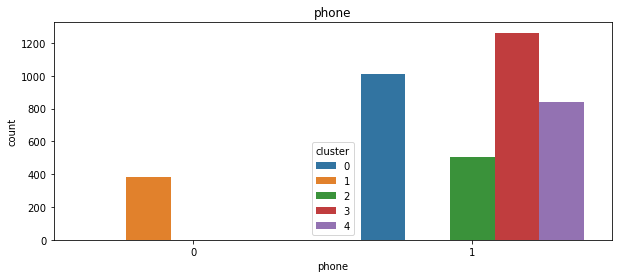

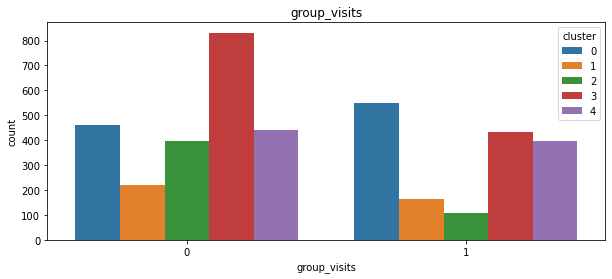

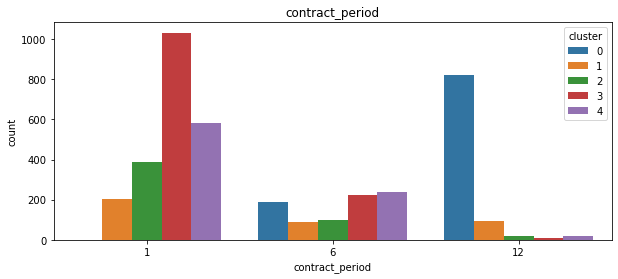

In [21]:
# графики распределения для дискетный переменных отрисуем функцией countplot():

for sign in discret_signs: 
    plt.figure(figsize=(10,4)) 

    sns.countplot(x = gym[sign], hue='cluster', data=gym)
    plt.title(sign)
    plt.show()

Выводы по распределению признаков по кластерам:
- распределение по полу не отличается;
- сотрудники компаний-партнеров чаще остаются посещать фитнесс-центр;
- ушедшие клиенты реже участвовали в промо-акции и реже посещали групповые занятия
- Особенно хорошо видно распределение по длительности абонемента – у лояльных клиентов это 12 месяцев, у нелояльных -1 месяц


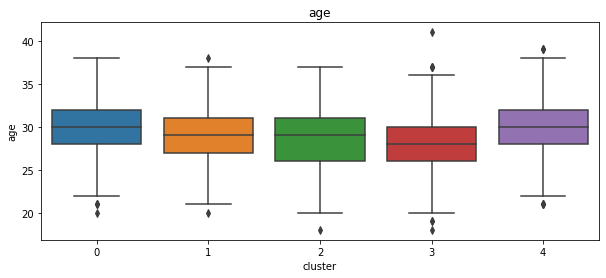

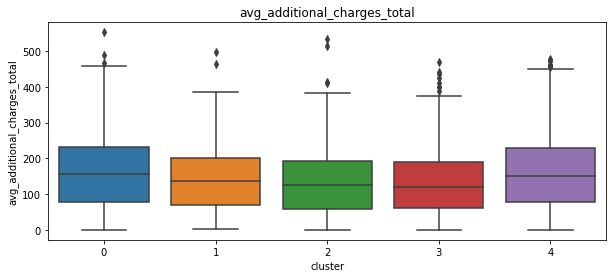

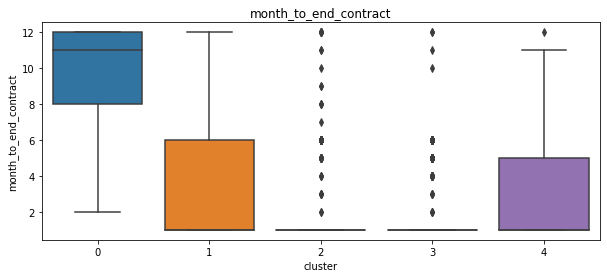

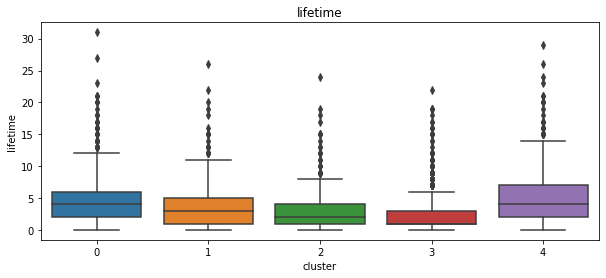

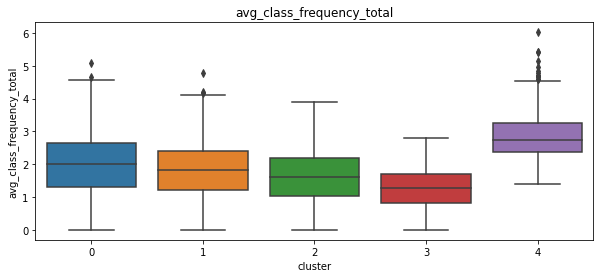

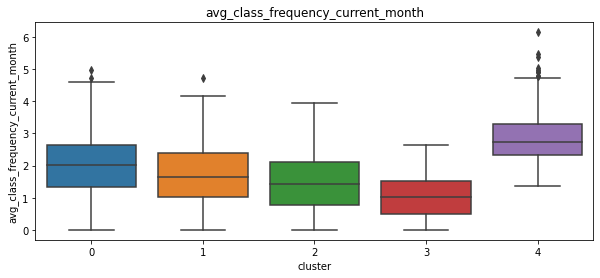

In [22]:
# графики распределения для непрерывных перемен отрисуем функцией boxplot():
for sign in gym.drop(discret_signs, axis = 1).drop(['churn', 'cluster'], axis = 1).columns: 
    plt.figure(figsize=(10,4)) 
    sns.boxplot(x = 'cluster', y = gym[sign], data=gym)
    plt.title(sign)
    plt.show()

Выводы по оставшимся признакам для кластеров с наиболее лояльными клиентами (0 и 4):
- средний возраста клиента выше;
- тратят больше на другие услуги фитнес-центра;
- больше оставшееся время до окончания срока действия абонемента;
- больше среднее количество посещений в неделю за всё время.

Подтвердилась разница при сравнении кластера 0 с самым низким уровнем оттока с кластером 1 – с самым высоким уровнем оттока клиентов: уходящие клиенты реже являются сотрудниками компаний-партнёров, реже участвовали в промо-акции, абонемент на срок 1 или 3 месяца, младше по возрасту, посещают занятия недолго и редко.

Для каждого полученного кластера посчитаем долю оттока.

In [23]:
for number in [0, 1, 2, 3, 4]:
     print('В кластере №', number, 'в отток попали',
           len(gym.query('churn==1 & cluster == @number')),
           'клиентов из',
           len(gym.query('cluster == @number')),
           '. Таким образом, доля оттока составила {:.1%}'.format(
           len(gym.query('churn==1 & cluster == @number')) / len(gym.query('cluster == @number')))
          )

В кластере № 0 в отток попали 28 клиентов из 1010 . Таким образом, доля оттока составила 2.8%
В кластере № 1 в отток попали 103 клиентов из 385 . Таким образом, доля оттока составила 26.8%
В кластере № 2 в отток попали 224 клиентов из 505 . Таким образом, доля оттока составила 44.4%
В кластере № 3 в отток попали 649 клиентов из 1262 . Таким образом, доля оттока составила 51.4%
В кластере № 4 в отток попали 57 клиентов из 838 . Таким образом, доля оттока составила 6.8%


Видим значительные различия по уровню оттока, наиболее склонные к оттоку - клиенты из кластеров 1 и 2.

<a name="5"></a>
## Выводы и рекомендации
Перевод в электронный вид множества клиентских анкет позволил провести предварительный анализ данных о 4000 клиентах сети.
Данные собраны качественно, во всех ячейках соответсвующий тип данных, пропущенных признаков нет. 
В отток попали 1061 клиентов, что составляет 26.52% от общей базы. Активных клиентов в имеющейся базе - 2939 человек.

Из графиков распределения признаков увидели следующее:
- чем больше продолжительность абонемента и чем дольше срок до его истечения, тем меньше показатель оттока;
- для работников компаний-партнёров отток в два меньше больше, чем клиентов, не имеющих корпоративные скидки;
- после посещений групповых занятий снижается склонность покинуть заведение;
- в среднем ушедшие клиенты более молоды, чем оставшиеся — 27 лет против 30 лет;
- отток происходит чаще чаще в течение первых двух месяцев занятий, после пятого месяца клиенты уходят крайне редко;
- незадолго до ухода снижается частота посещения клиентами фитнес-центра до 1-2 занятий в неделю.

В результат построения матрицы корелляций мы обнаружили тесную взаимосвязь между длительностью текущего абонемента и сроком до окончания текущего абонемента; а также между средней частотой посещений в неделю за предыдущий месяц и средней частотой посещений в неделю за все время с начала действия абонемента.

По итогам сравнения двух моделей прогнозирования оттока клиента рекомендуется использовать модель по алгоритму обучения логистической регрессии. Благодаря ей можно с точносью в 93% прогнозировать вероятность оттока по каждому клиенту. 

После стандартизации данных, построения матрицы расстояний и обучения модели кластеризации мы спрогнозировали 5 кластеров клиентов. Можно выделить следующие целевые группы клиентов:

Наиболее лояльные клиенты - кластер 0: 
- в основном клиенты живут или работают недалеко от фитнес-центра;
- высокая доля сотрудников компаний-партнеров - 78%;
- больше половины пришли по акции "приведи друга";
- наибольший срок абонемента - в среднем 11 месяцев (точнее - 12 - максимальный абонемент);
- чаще клиентов в других кластерах посещают групповые занятия;
- трятят немного больше на прочие услуги фитнес-центра.

Наименее лояльные клиенты - кластеры 3 и 2 : 

- невысокая доля сотрудников компаний-партнеров;
- крайне редко приходят по промо-акции "приведи друга";
- редко посещают групповые занятия;
- наименьший срок абонемента - 1 или 3 месяца;
- средний возраст клиента младше клиентов в других кластерах;
- трятят меньше клиентов в других кластерах на прочие услуги фитнес-центра;
- недолго посещают занятия - чуть больше двух месяцев;
- реже других посещают занятия как за все время, так и в последний месяц - один раз в неделю или реже.

Благодаря проделанной работе можем рекомендовать для удержания клиентов следующий план действий:
1. Привлекать новые компании в качестве партнёра клуба с предоставлением скидки на абонемент сотрудникам;
2. Рекомендуется предоставлять промо-коды на скидку через каждые полгода абонемента для активных посетителей;
3. Раздать анкеты-опросники клиентам в возрасте до 30 лет с целью поиска возможности повышения привлекательности для более молодых клиентов;
4. Сделать 10% скидки на посещение групповых занятий, т.к. этот показатель влияет на уровень оттока;
5. Завлекать клиентов на посещение более двух занятий в неделю - например, предлагать кислородный коктейль в подарок после окончания третьего занятия.